Парсер сайта https://fabstore.ru 

---
Результатом мы получаем: Название товара, название бренда, ссылку на товар и фото товара

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir Parsing

In [ ]:
!cp data.csv

cp: missing destination file operand after 'data.csv'
Try 'cp --help' for more information.


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import os

In [ ]:
!cp data.csv 


cp: missing destination file operand after 'data.csv'
Try 'cp --help' for more information.


In [ ]:
!touch /content/Результат/result.csv

In [ ]:
HOST = 'https://fabstore.ru'
URL =  'https://fabstore.ru/catalog/kurtki'

In [ ]:
CSV = '/content/Parsing/result.csv'

In [ ]:
HEADERS = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36 OPR/92.0.0.0'
}

In [ ]:
def get_html(url, params=''):
  r = requests.get(url, headers= HEADERS,params=params)
  return r

In [ ]:
from pickle import encode_long
def get_content(html):
  soup = BeautifulSoup(html, 'html.parser')
  items = soup.find_all('div', class_ ='product-card')
  clothes = []


  for item in items:
     
    clothes.append(
        {
            'name':item.find('div', class_ ='product-card__desc-line').get_text(strip =True),
            'name_brand':item.find('div', class_ ='product-card__title').get_text(strip =True),
            'link':HOST+item.find('a', class_='product-card__link').get('href'),
            
            'img': HOST+ item.find('img', class_ ='product-card__pic').get('src')
        }
    )
  return clothes

In [ ]:
def save_doc(items,path):
  with open(path,'w', newline='') as file:
    writer =csv.writer(file,delimiter=';')
    writer.writerow(['Название','Название бренда', 'ССылка на товар','Фото товара'])
    for item in items:
      writer.writerow([item['name'],item['name_brand'], item['link'],item['img']])


In [ ]:
html = get_html(URL)
print(get_content(html.text))
print(html)

[{'name': 'Мужская куртка Vans Drill Chore Coat Lined', 'name_brand': 'Vans', 'link': 'https://fabstore.ru/product/muzhskaya-kurtka-vans-drill-chore-coat-lined/', 'img': 'https://fabstore.ru/upload/resize_cache/iblock/db6/360_460_240cd750bba9870f18aada2478b24840a/7zrj9xbksv6jbbw90y4nzwx0b37oaywm.png'}, {'name': 'Мужская куртка Holubar Boulder Black', 'name_brand': 'Holubar', 'link': 'https://fabstore.ru/product/holubar-boulder-black-holboulderblk/', 'img': 'https://fabstore.ru/upload/resize_cache/iblock/a3b/360_460_240cd750bba9870f18aada2478b24840a/a3b9a9e3338ce446329c847caa3345a4.jpeg'}, {'name': 'Мужская куртка Holubar Deer Hunter Black', 'name_brand': 'Holubar', 'link': 'https://fabstore.ru/product/holubar-deer-hunter-black-holdeerhunterblk/', 'img': 'https://fabstore.ru/upload/resize_cache/iblock/46c/360_460_240cd750bba9870f18aada2478b24840a/46cbaa64045a88f239dda1d296a4ce6b.jpeg'}, {'name': 'Мужская куртка Holubar New Oregon Military Olive', 'name_brand': 'Holubar', 'link': 'https:

In [ ]:
def parser():
  PAGENATTION = 5
  #PAGENATTION = int(PAGENATTION.strip())
  html = get_html(URL)
  if html.status_code == 200:
    cards = []
    for page in range(0,PAGENATTION):
      print(f'Парсим страницу:{(round(page)+1)}')
      html = get_html(URL, params = {'page': page})
      cards.extend(get_content(html.text))
      save_doc(cards,CSV)
    print(cards)
  else:
    print("САйт полёг!!!")
  


In [ ]:
parser()

Парсим страницу:0
Парсим страницу:1
Парсим страницу:2
Парсим страницу:3
Парсим страницу:4
[{'name': 'Мужская куртка Vans Drill Chore Coat Lined', 'name_brand': 'Vans', 'link': 'https://fabstore.ru/product/muzhskaya-kurtka-vans-drill-chore-coat-lined/', 'img': 'https://fabstore.ru/upload/resize_cache/iblock/db6/360_460_240cd750bba9870f18aada2478b24840a/7zrj9xbksv6jbbw90y4nzwx0b37oaywm.png'}, {'name': 'Мужская куртка Holubar Boulder Black', 'name_brand': 'Holubar', 'link': 'https://fabstore.ru/product/holubar-boulder-black-holboulderblk/', 'img': 'https://fabstore.ru/upload/resize_cache/iblock/a3b/360_460_240cd750bba9870f18aada2478b24840a/a3b9a9e3338ce446329c847caa3345a4.jpeg'}, {'name': 'Мужская куртка Holubar Deer Hunter Black', 'name_brand': 'Holubar', 'link': 'https://fabstore.ru/product/holubar-deer-hunter-black-holdeerhunterblk/', 'img': 'https://fabstore.ru/upload/resize_cache/iblock/46c/360_460_240cd750bba9870f18aada2478b24840a/46cbaa64045a88f239dda1d296a4ce6b.jpeg'}, {'name': 'М

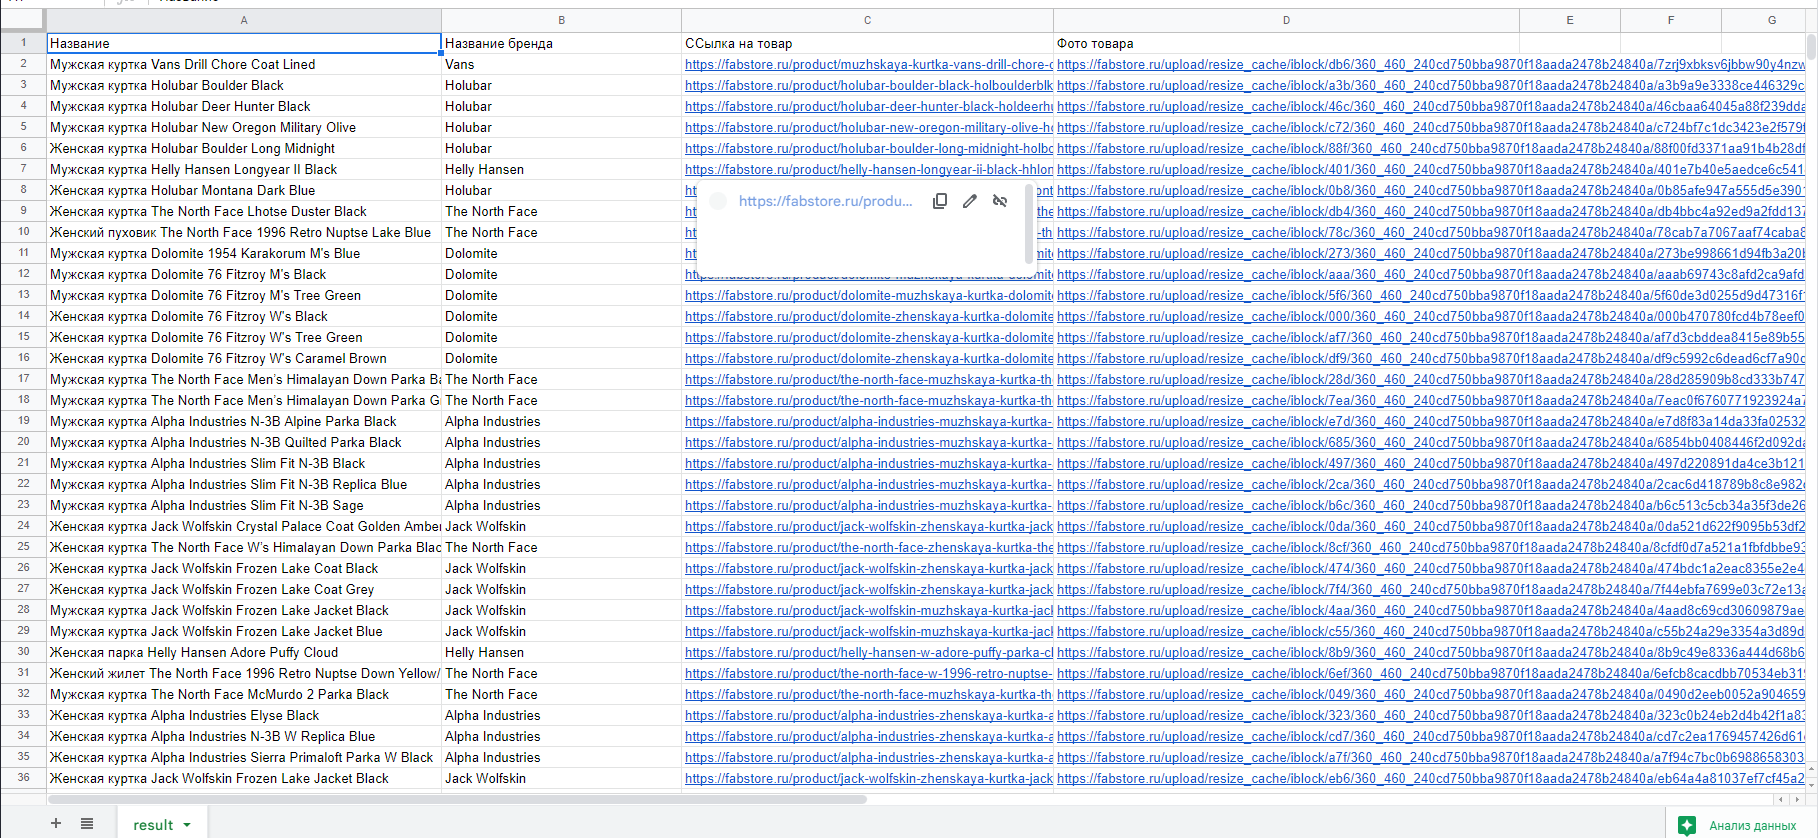